## Question 4 [25 pts]

In this question you will build a Restricted Boltzmann Machine (RBM). Then, you will train two
logistic regression classifiers (LRC) **without any regularization**. The first one will be trained by using the pixels of the images as features, and the second one will be trained using the output at the hidden layer of the RBM as inputs.

Specifically, let Xtrain and Xtest denote your training and test data, respectively. You will train your
RBM using Xtrain , and learn a transformation, f (·) that maps the visible input to the latent (hidden)
outputs. You will then train two LRCs, one with input Xtrain and another one with input f (Xtrain ).

After the training phase, you will report the accuracy of LRC trained with raw pixels on Xtrain and
Xtest, and the accuracy of LRC trained with the output of the RBM on f (Xtrain ) and f (Xtest ).
Simulation details are explained below:

The RBM will have binary visible and hidden units. It should be trained using contrastive divergence
(CD). Download the dataset ps4q4.mat from Moodle . You can use the whole training dataset if you
want to or you can use randomly selected 10000 samples from the training set (since the dataset is
large and it can be time consuming to train using the entire training set). You must use the entire
test set for evaluation. Include all the simulation code with your submission to get credit from this
question. The parameters of your RBM should be as follows:

* Learning rate = 0.05
* Epochs = 20
* Batch size = 10
* K value for CD = try different values and see the effect, even though 1 might work surprisingly well.
* number of hidden components = see below

When selecting the number of hidden components use at least 5 different values. You will notice that
setting this value too low will make the performance of the RBM+LRC actually worse than using
LRC on pixels directly.

Include at least one such case when reporting accuracies, and include at least
one case where the performance of RBM+LRC is higher than using only LRC.

Also for each value of number of hidden components, plot the resulting weights for each hidden component as images (you will have # of hidden componentsx28x28 images, use subplot when plotting each of them, so
that they will be on the same figure).

Note that if you are selecting a different subset of training data for each experiment, you need to also report the LRC only score for each experiment. For logistic regression, you can use one of the off-the-shelf software packages.


In [1]:
from RBM import RBM

import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import copy

np.random.seed(1)  # set the seed for reproducibility

In [2]:
print('Loading Data...\n')

tr_X = sio.loadmat('ps4q4.mat')['tr_X'].T
tr_y = sio.loadmat('ps4q4.mat')['tr_y']
ts_X = sio.loadmat('ps4q4.mat')['ts_X'].T
ts_y = sio.loadmat('ps4q4.mat')['ts_y']

# using randomly selected 10000 for training
index = np.random.permutation(np.arange(60000))[:10000]

tr_X = (tr_X[index, :])
tr_y = (tr_y[index])

# ─── SIMULATION SETTINGS ────────────────────────────────────────────────────────

num_of_hidden_units = (9,25,49,81,100)
k = (3,2,1) # for CD 

# ─── SIMULATION ─────────────────────────────────────────────────────────────────

    # ─── LOGISTIC REGRESSION USING ROW IMAGES ───────────────────────────────────────
print('Starting Simulation...\n')

logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')
logreg.fit(tr_X, tr_y.reshape(-1))
tr_y_predicted = logreg.predict(tr_X)
acc_tr = accuracy_score(tr_y, tr_y_predicted)
print('\nTraining accuracy of LogReg: {}'.format(acc_tr))
ts_y_predicted = logreg.predict(ts_X)
acc_ts = accuracy_score(ts_y, ts_y_predicted)
print('Test accuracy of LogReg:    {}'.format(acc_ts))
print('-'*60)  


Loading Data...

Starting Simulation...


Training accuracy of LogReg: 0.9784
Test accuracy of LogReg:    0.8926
------------------------------------------------------------



Model with 9 hidden units & k:3

Training started...
epoch -> 1/20
epoch -> 2/20
epoch -> 3/20
epoch -> 4/20
epoch -> 5/20
epoch -> 6/20
epoch -> 7/20
epoch -> 8/20
epoch -> 9/20
epoch -> 10/20
epoch -> 11/20
epoch -> 12/20
epoch -> 13/20
epoch -> 14/20
epoch -> 15/20
epoch -> 16/20
epoch -> 17/20
epoch -> 18/20
epoch -> 19/20
epoch -> 20/20


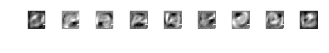


Training accuracy of LogReg+RBM: 0.6876
Test accuracy of LogReg+RBM:	 0.6805
----------------------------------------

Model with 25 hidden units & k:3

Training started...
epoch -> 1/20
epoch -> 2/20
epoch -> 3/20
epoch -> 4/20
epoch -> 5/20
epoch -> 6/20
epoch -> 7/20
epoch -> 8/20
epoch -> 9/20
epoch -> 10/20
epoch -> 11/20
epoch -> 12/20
epoch -> 13/20
epoch -> 14/20
epoch -> 15/20
epoch -> 16/20
epoch -> 17/20
epoch -> 18/20
epoch -> 19/20
epoch -> 20/20


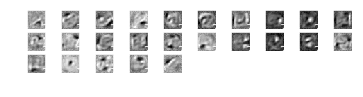


Training accuracy of LogReg+RBM: 0.8377
Test accuracy of LogReg+RBM:	 0.8307
----------------------------------------

Model with 49 hidden units & k:3

Training started...
epoch -> 1/20
epoch -> 2/20
epoch -> 3/20
epoch -> 4/20
epoch -> 5/20
epoch -> 6/20
epoch -> 7/20
epoch -> 8/20
epoch -> 9/20
epoch -> 10/20
epoch -> 11/20
epoch -> 12/20
epoch -> 13/20
epoch -> 14/20
epoch -> 15/20
epoch -> 16/20
epoch -> 17/20
epoch -> 18/20
epoch -> 19/20
epoch -> 20/20


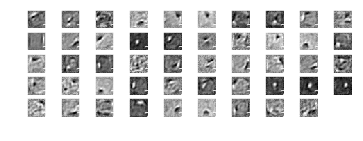


Training accuracy of LogReg+RBM: 0.8988
Test accuracy of LogReg+RBM:	 0.8954
----------------------------------------

Model with 81 hidden units & k:3

Training started...
epoch -> 1/20
epoch -> 2/20
epoch -> 3/20
epoch -> 4/20
epoch -> 5/20
epoch -> 6/20
epoch -> 7/20
epoch -> 8/20
epoch -> 9/20
epoch -> 10/20
epoch -> 11/20
epoch -> 12/20
epoch -> 13/20
epoch -> 14/20
epoch -> 15/20
epoch -> 16/20
epoch -> 17/20
epoch -> 18/20
epoch -> 19/20
epoch -> 20/20


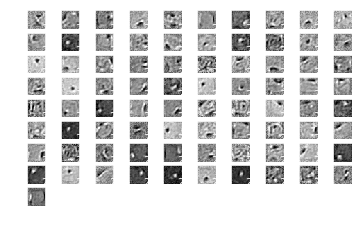


Training accuracy of LogReg+RBM: 0.9207
Test accuracy of LogReg+RBM:	 0.9056
----------------------------------------

Model with 100 hidden units & k:3

Training started...
epoch -> 1/20
epoch -> 2/20
epoch -> 3/20
epoch -> 4/20
epoch -> 5/20
epoch -> 6/20
epoch -> 7/20
epoch -> 8/20
epoch -> 9/20
epoch -> 10/20
epoch -> 11/20
epoch -> 12/20
epoch -> 13/20
epoch -> 14/20
epoch -> 15/20
epoch -> 16/20
epoch -> 17/20
epoch -> 18/20
epoch -> 19/20
epoch -> 20/20


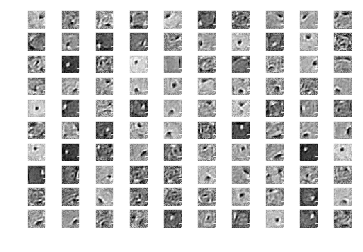


Training accuracy of LogReg+RBM: 0.9353
Test accuracy of LogReg+RBM:	 0.9071
----------------------------------------

----------------------------------------
Changing k...
----------------------------------------


Model with 9 hidden units & k:2

Training started...
epoch -> 1/20
epoch -> 2/20
epoch -> 3/20
epoch -> 4/20
epoch -> 5/20
epoch -> 6/20
epoch -> 7/20
epoch -> 8/20
epoch -> 9/20
epoch -> 10/20
epoch -> 11/20
epoch -> 12/20
epoch -> 13/20
epoch -> 14/20
epoch -> 15/20
epoch -> 16/20
epoch -> 17/20
epoch -> 18/20
epoch -> 19/20
epoch -> 20/20


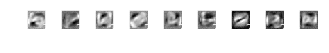


Training accuracy of LogReg+RBM: 0.653
Test accuracy of LogReg+RBM:	 0.6579
----------------------------------------

Model with 25 hidden units & k:2

Training started...
epoch -> 1/20
epoch -> 2/20
epoch -> 3/20
epoch -> 4/20
epoch -> 5/20
epoch -> 6/20
epoch -> 7/20
epoch -> 8/20
epoch -> 9/20
epoch -> 10/20
epoch -> 11/20
epoch -> 12/20
epoch -> 13/20
epoch -> 14/20
epoch -> 15/20
epoch -> 16/20
epoch -> 17/20
epoch -> 18/20
epoch -> 19/20
epoch -> 20/20


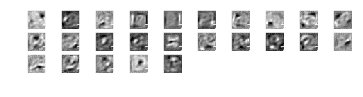


Training accuracy of LogReg+RBM: 0.8485
Test accuracy of LogReg+RBM:	 0.8426
----------------------------------------

Model with 49 hidden units & k:2

Training started...
epoch -> 1/20
epoch -> 2/20
epoch -> 3/20
epoch -> 4/20
epoch -> 5/20
epoch -> 6/20
epoch -> 7/20
epoch -> 8/20
epoch -> 9/20
epoch -> 10/20
epoch -> 11/20
epoch -> 12/20
epoch -> 13/20
epoch -> 14/20
epoch -> 15/20
epoch -> 16/20
epoch -> 17/20
epoch -> 18/20
epoch -> 19/20
epoch -> 20/20


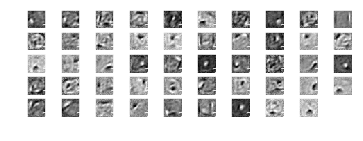


Training accuracy of LogReg+RBM: 0.8959
Test accuracy of LogReg+RBM:	 0.8918
----------------------------------------

Model with 81 hidden units & k:2

Training started...
epoch -> 1/20
epoch -> 2/20
epoch -> 3/20
epoch -> 4/20
epoch -> 5/20
epoch -> 6/20
epoch -> 7/20
epoch -> 8/20
epoch -> 9/20
epoch -> 10/20
epoch -> 11/20
epoch -> 12/20
epoch -> 13/20
epoch -> 14/20
epoch -> 15/20
epoch -> 16/20
epoch -> 17/20
epoch -> 18/20
epoch -> 19/20
epoch -> 20/20


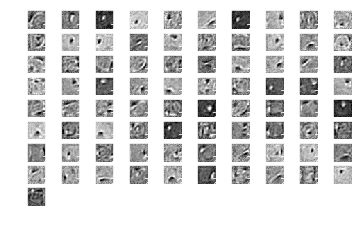


Training accuracy of LogReg+RBM: 0.9241
Test accuracy of LogReg+RBM:	 0.9046
----------------------------------------

Model with 100 hidden units & k:2

Training started...
epoch -> 1/20
epoch -> 2/20
epoch -> 3/20
epoch -> 4/20
epoch -> 5/20
epoch -> 6/20
epoch -> 7/20
epoch -> 8/20
epoch -> 9/20
epoch -> 10/20
epoch -> 11/20
epoch -> 12/20
epoch -> 13/20
epoch -> 14/20
epoch -> 15/20
epoch -> 16/20
epoch -> 17/20
epoch -> 18/20
epoch -> 19/20
epoch -> 20/20


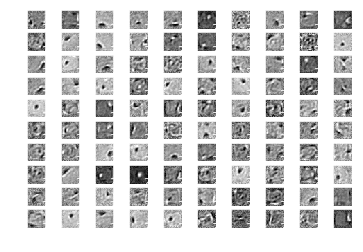


Training accuracy of LogReg+RBM: 0.937
Test accuracy of LogReg+RBM:	 0.9083
----------------------------------------

----------------------------------------
Changing k...
----------------------------------------


Model with 9 hidden units & k:1

Training started...
epoch -> 1/20
epoch -> 2/20
epoch -> 3/20
epoch -> 4/20
epoch -> 5/20
epoch -> 6/20
epoch -> 7/20
epoch -> 8/20
epoch -> 9/20
epoch -> 10/20
epoch -> 11/20
epoch -> 12/20
epoch -> 13/20
epoch -> 14/20
epoch -> 15/20
epoch -> 16/20
epoch -> 17/20
epoch -> 18/20
epoch -> 19/20
epoch -> 20/20


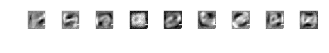


Training accuracy of LogReg+RBM: 0.6149
Test accuracy of LogReg+RBM:	 0.61
----------------------------------------

Model with 25 hidden units & k:1

Training started...
epoch -> 1/20
epoch -> 2/20
epoch -> 3/20
epoch -> 4/20
epoch -> 5/20
epoch -> 6/20
epoch -> 7/20
epoch -> 8/20
epoch -> 9/20
epoch -> 10/20
epoch -> 11/20
epoch -> 12/20
epoch -> 13/20
epoch -> 14/20
epoch -> 15/20
epoch -> 16/20
epoch -> 17/20
epoch -> 18/20
epoch -> 19/20
epoch -> 20/20


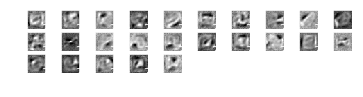


Training accuracy of LogReg+RBM: 0.8234
Test accuracy of LogReg+RBM:	 0.8231
----------------------------------------

Model with 49 hidden units & k:1

Training started...
epoch -> 1/20
epoch -> 2/20
epoch -> 3/20
epoch -> 4/20
epoch -> 5/20
epoch -> 6/20
epoch -> 7/20
epoch -> 8/20
epoch -> 9/20
epoch -> 10/20
epoch -> 11/20
epoch -> 12/20
epoch -> 13/20
epoch -> 14/20
epoch -> 15/20
epoch -> 16/20
epoch -> 17/20
epoch -> 18/20
epoch -> 19/20
epoch -> 20/20


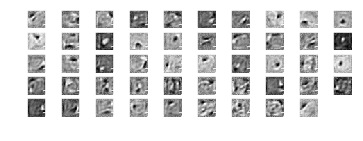


Training accuracy of LogReg+RBM: 0.8898
Test accuracy of LogReg+RBM:	 0.8806
----------------------------------------

Model with 81 hidden units & k:1

Training started...
epoch -> 1/20
epoch -> 2/20
epoch -> 3/20
epoch -> 4/20
epoch -> 5/20
epoch -> 6/20
epoch -> 7/20
epoch -> 8/20
epoch -> 9/20
epoch -> 10/20
epoch -> 11/20
epoch -> 12/20
epoch -> 13/20
epoch -> 14/20
epoch -> 15/20
epoch -> 16/20
epoch -> 17/20
epoch -> 18/20
epoch -> 19/20
epoch -> 20/20


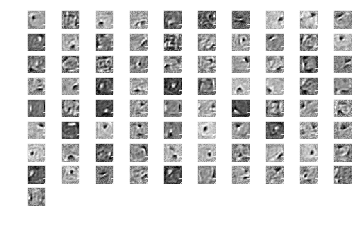


Training accuracy of LogReg+RBM: 0.9232
Test accuracy of LogReg+RBM:	 0.9031
----------------------------------------

Model with 100 hidden units & k:1

Training started...
epoch -> 1/20
epoch -> 2/20
epoch -> 3/20
epoch -> 4/20
epoch -> 5/20
epoch -> 6/20
epoch -> 7/20
epoch -> 8/20
epoch -> 9/20
epoch -> 10/20
epoch -> 11/20
epoch -> 12/20
epoch -> 13/20
epoch -> 14/20
epoch -> 15/20
epoch -> 16/20
epoch -> 17/20
epoch -> 18/20
epoch -> 19/20
epoch -> 20/20


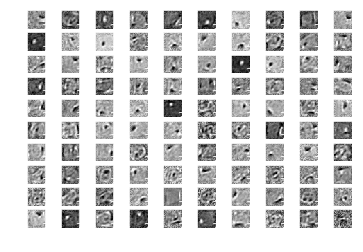


Training accuracy of LogReg+RBM: 0.9333
Test accuracy of LogReg+RBM:	 0.9049
----------------------------------------

----------------------------------------
Changing k...
----------------------------------------



In [3]:
for cdk in k:
    for hid in num_of_hidden_units:
        print('\nModel with {} hidden units & k:{}\n'.format(hid,cdk))

        rbm = RBM(shape=(hid,784)) #create RBM
        # Train RBM
        rbm.fit(data=tr_X, epochs=20, batch_size=10, l_rate=0.05, cd_k=cdk) 

        # Get weights
        weight = rbm.get_parameters()['W']

        # Plot weights as images
        for i in range(hid):
            plt.subplot(10,10, i+1)
            plt.imshow(weight[i,:].reshape(28, 28), cmap='gray')
        plt.show()

        # ─── LOGISTIC REGRESSION USING RBM IMAGES ───────────────────────────────────────────

        tr_X_ = np.zeros((tr_X.shape[0],rbm.shape[0]))
        for i in range(tr_X.shape[0]):
            tr_X_[i,:] = rbm.transform(tr_X[i,:])

        ts_X_ = np.zeros((ts_X.shape[0],rbm.shape[0]))
        for i in range(ts_X.shape[0]):
            ts_X_[i,:] = rbm.transform(ts_X[i,:])

        logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')
        logreg.fit(tr_X_, tr_y.reshape(-1))
        tr_y_predicted = logreg.predict(tr_X_)
        acc_tr = accuracy_score(tr_y, tr_y_predicted)
        print('\nTraining accuracy of LogReg+RBM: {}'.format(acc_tr))
        ts_y_predicted = logreg.predict(ts_X_)
        acc_ts = accuracy_score(ts_y, ts_y_predicted)
        print('Test accuracy of LogReg+RBM:\t {}'.format(acc_ts))
        print('-'*40)
    print('\n'+'-'*40) 
    print('Changing k...')
    print('-'*40+'\n')

| Accuracy %                  | **CD_k = 1**                           | **CD_k = 2**                           | **CD_k = 3**                           |
| --------------------------- | -------------------------------------- | -------------------------------------- | -------------------------------------- |
| **# of hidden units = 9**  | **Train Acc:** 61.5**/Test Acc** 61    | **Train Acc:** 65.3 **/Test Acc** 65.8 | **Train Acc:** 68.7 **/Test Acc** 68   |
| **# of hidden units = 25**  | **Train Acc:** 82.3 **/Test Acc** 82.3 | **Train Acc:** 84.8 **/Test Acc** 84.2 | **Train Acc:** 83.7 **/Test Acc** 83   |
| **# of hidden units = 49**  | **Train Acc:** 89 **/Test Acc** 88     | **Train Acc:** 89.6**/Test Acc** 89.2  | **Train Acc:** 89.8 **/Test Acc** 89.5 |
| **# of hidden units = 81**  | **Train Acc:** 92.3**/Test Acc** 90.3  | **Train Acc:** 92 **/Test Acc** 90     | **Train Acc:** 92 **/Test Acc** 90.5   |
| **# of hidden units = 100** | **Train Acc:** 93.3**/Test Acc** 90.5  | **Train Acc:** 93.7**/Test Acc** 91    | **Train Acc:** 93.5 **/Test Acc** 90.7 |

Training accuracy of LogReg: 0.9784  
Test accuracy of LogReg:    **0.8926**

So, models with 49 or more hidden units generally have a better test performance.
Maximum test accuracy ,**0.9083**, obtained with 100 hidden units and k=2.